<a href="https://colab.research.google.com/github/SammyBett/AI-Coursework-2025/blob/main/Stars_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning and Exploratory Data Analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# URL for the raw CSV data
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first 5 rows to understand the data
print(df.head())

# Get a concise summary of the DataFrame
print(df.info())

Dataset loaded successfully!
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtyp

In [ ]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# If there are missing values, you could drop the rows:
# df.dropna(inplace=True)
# Or fill them if it makes sense (e.g., with the mean or mode)
# df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)


# 2. Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Remove duplicate rows if any
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")


# 3. Check data types and unique values for categorical columns
# From df.info(), 'Star color' and 'Spectral Class' are likely 'object' types.
# Let's inspect their unique values for inconsistencies.

print(f"\nUnique values in 'Star color':")
print(df['Star color'].unique())

print(f"\nUnique values in 'Spectral Class':")
print(df['Spectral Class'].unique())

# You might find inconsistencies like 'Blue-white' vs 'Blue-White'.
# We can clean them up.
df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
# Add more cleaning lines as needed based on your unique values.


# 4. (Optional) Rename columns for easier use
# The dataset uses 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)'. Let's make them more descriptive.
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)

print("\nData cleaning complete. Updated DataFrame info:")
print(df.info())

Missing values per column:
Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

Number of duplicate rows: 0

Unique values in 'Star color':
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']

Unique values in 'Spectral Class':
['M' 'B' 'A' 'F' 'O' 'K' 'G']

Data cleaning complete. Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature (K)     240 non-null    int64  
 1   Luminosity          240 non-null    float64
 2   Radius        

Exploratory Data Analysis

In [ ]:
# Get descriptive statistics for numerical columns
print(df.describe())

       Temperature (K)     Luminosity       Radius  Absolute_Magnitude  \
count       240.000000     240.000000   240.000000          240.000000   
mean      10497.462500  107188.361635   237.157781            4.382396   
std        9552.425037  179432.244940   517.155763           10.532512   
min        1939.000000       0.000080     0.008400          -11.920000   
25%        3344.250000       0.000865     0.102750           -6.232500   
50%        5776.000000       0.070500     0.762500            8.313000   
75%       15055.500000  198050.000000    42.750000           13.697500   
max       40000.000000  849420.000000  1948.500000           20.060000   

        Star type  
count  240.000000  
mean     2.500000  
std      1.711394  
min      0.000000  
25%      1.000000  
50%      2.500000  
75%      4.000000  
max      5.000000  


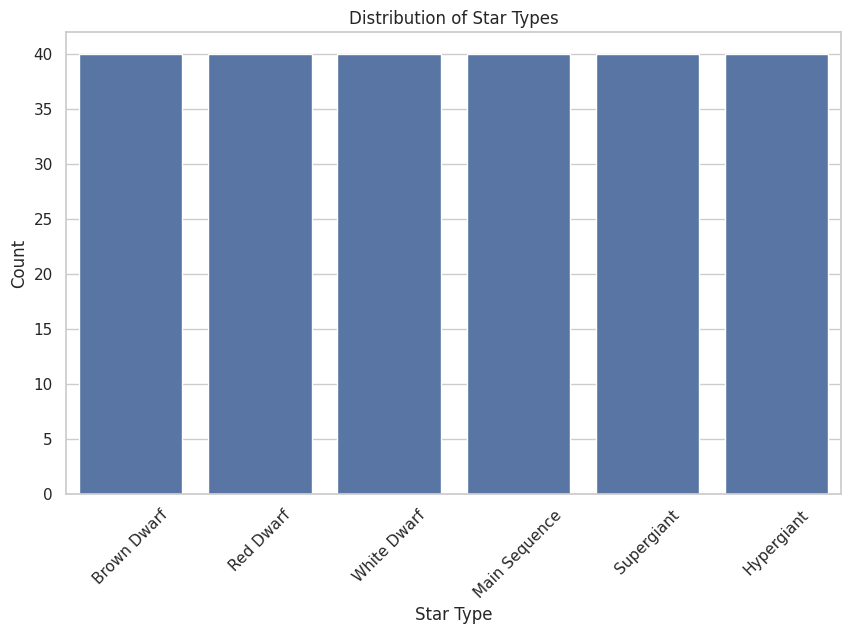

In [ ]:
# Create a count plot for the 'Star type' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Star type')

# Add labels for clarity (assuming the encoding above)
type_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
plt.xticks(ticks=range(6), labels=type_labels, rotation=45)
plt.title('Distribution of Star Types')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.show()

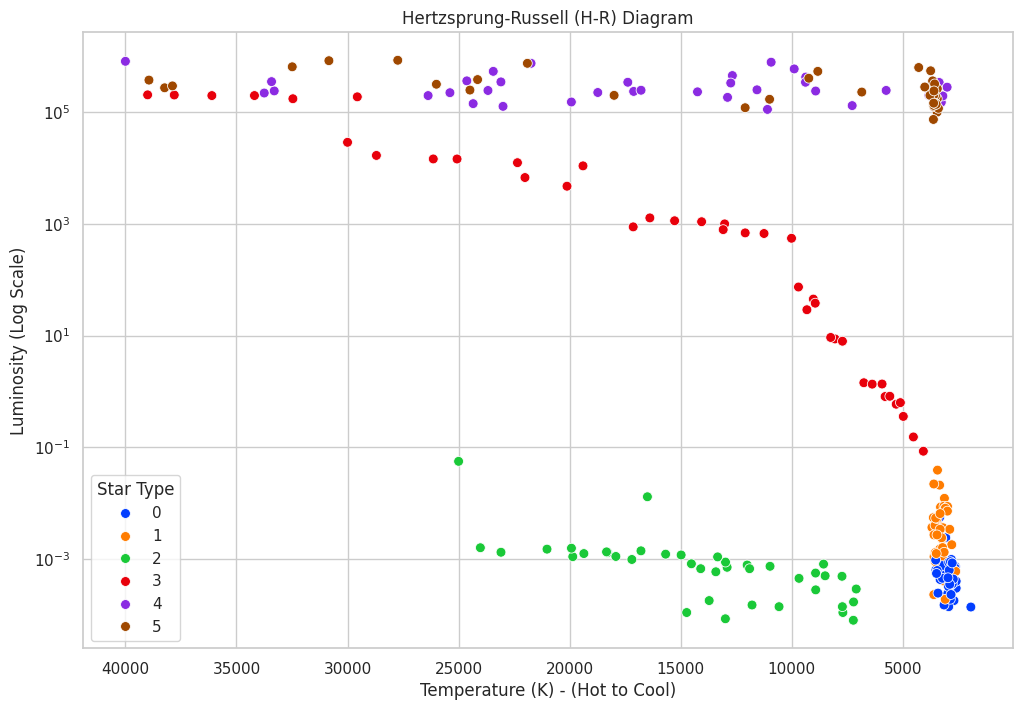

In [ ]:
# Create a scatter plot of Temperature vs. Luminosity
# We'll use 'Type' to color-code the points.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperature (K)', y='Luminosity', hue='Star type', palette='bright', s=50)

# The H-R diagram often uses a log scale for luminosity
plt.yscale('log')
# The H-R diagram plots temperature decreasing to the right
plt.gca().invert_xaxis()

plt.title('Hertzsprung-Russell (H-R) Diagram')
plt.xlabel('Temperature (K) - (Hot to Cool)')
plt.ylabel('Luminosity (Log Scale)')
plt.legend(title='Star Type')
plt.show()

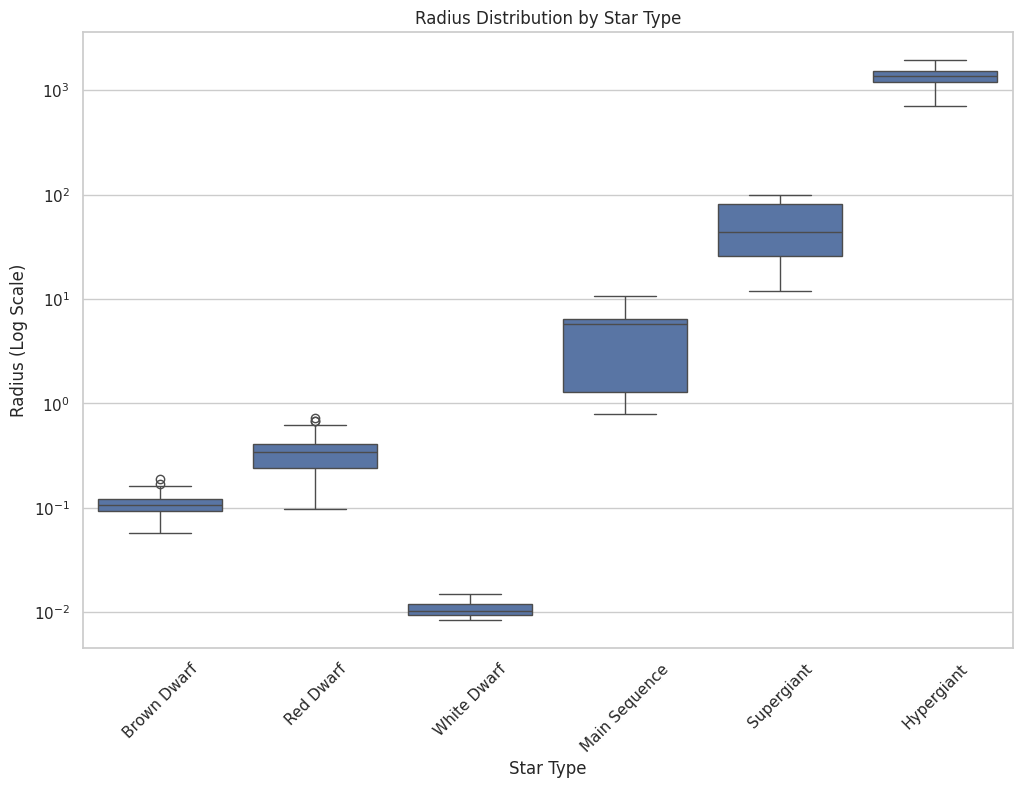

In [ ]:
# Create a box plot for 'Star type' vs 'Radius'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Star type', y='Radius')

# Use a log scale for Radius due to extreme differences
plt.yscale('log')

plt.xticks(ticks=range(6), labels=type_labels, rotation=45)
plt.title('Radius Distribution by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Radius (Log Scale)')
plt.show()

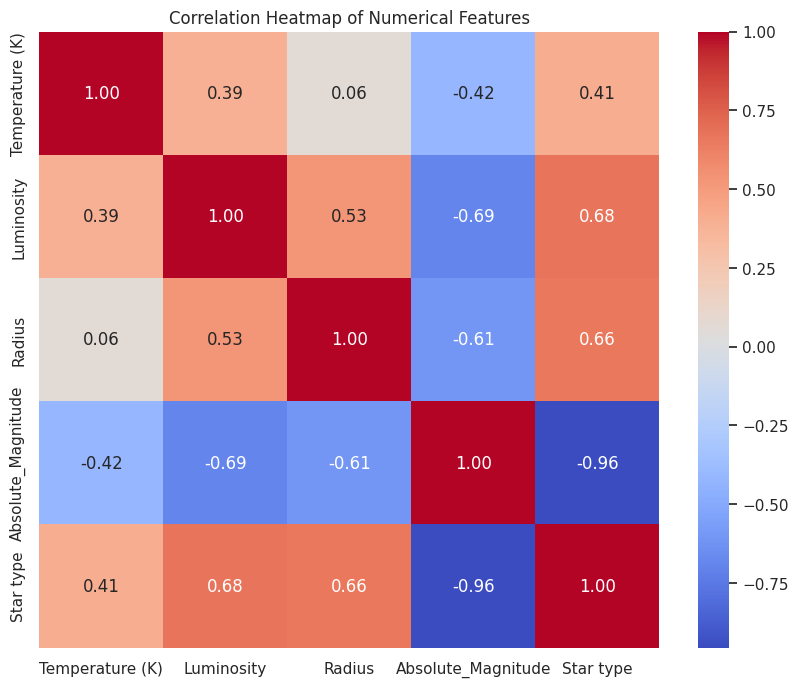

In [ ]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Q3. Create a model based on the k-Nearest Neighbours algorithm for classification

Dataset loaded successfully for Q3 re-evaluation!
Data cleaned and columns renamed for Q3 re-evaluation.
Features selected for KNN (based on Q2 correlation): ['Absolute_Magnitude', 'Luminosity']
Data split into training (192 samples) and testing (48 samples) sets.
Features scaled successfully!

Optimal k value found: 5
Maximum accuracy achieved: 0.8750


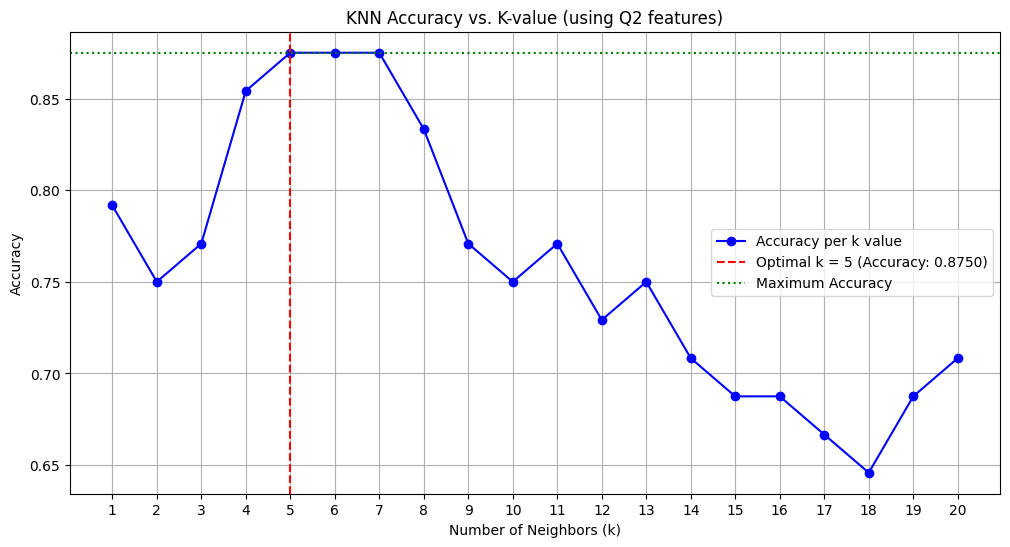

In [2]:
# --- 1. Data Loading and Cleaning (Re-included for self-containment) ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully for Q3 re-evaluation!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)
print("Data cleaned and columns renamed for Q3 re-evaluation.")

# --- 2. Feature Selection based on Q2 Correlation Matrix ---
# From Q2, 'Absolute_Magnitude' (-0.95) and 'Luminosity' (0.68) had the strongest correlation with 'Star type'.
feature_columns = ['Absolute_Magnitude', 'Luminosity']

X = df[feature_columns]
y = df['Star type']
print(f"Features selected for KNN (based on Q2 correlation): {feature_columns}")

# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

# --- 4. Scale Features using StandardScaler ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Features scaled successfully!")

# --- 5. Determine Optimal K for KNN ---
accuracy_scores = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

optimal_k_index = accuracy_scores.index(max(accuracy_scores))
optimal_k = k_range[optimal_k_index]
max_accuracy = max(accuracy_scores)

print(f"\nOptimal k value found: {optimal_k}")
print(f"Maximum accuracy achieved: {max_accuracy:.4f}")

# --- 6. Visualize Optimal K ---
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='-', color='blue', label='Accuracy per k value')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k} (Accuracy: {max_accuracy:.4f})')
plt.axhline(y=max_accuracy, color='green', linestyle=':', label='Maximum Accuracy')

plt.title('KNN Accuracy vs. K-value (using Q2 features)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(list(k_range))
plt.grid(True)
plt.legend()
plt.show()


Q4. Create another eager learning classifier as assigned based on at least 2 suitable features for one target variable.

### Decision Tree Classifier

Features selected for Decision Tree: ['Absolute_Magnitude', 'Luminosity']
Decision Tree Classifier trained successfully!

Accuracy of Decision Tree Classifier: 0.8958

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.60      0.86      0.71         7
           2       0.67      0.33      0.44         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           0.90        48
   macro avg       0.88      0.87      0.86        48
weighted avg       0.90      0.90      0.89        48



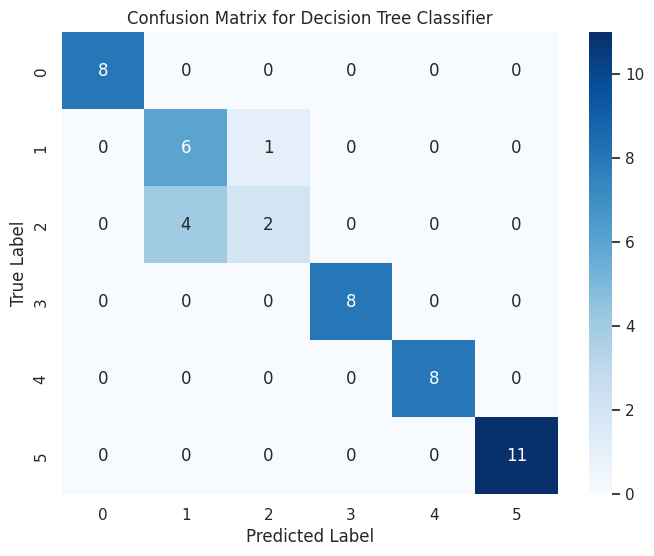

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Select suitable features for the Decision Tree Classifier ---
# Based on the correlation matrix, Absolute_Magnitude and Luminosity have strong correlations with 'Star type'.
dtc_features = ['Absolute_Magnitude', 'Luminosity']

X_train_dtc = X_train[dtc_features]
X_test_dtc = X_test[dtc_features]

print(f"Features selected for Decision Tree: {dtc_features}")

# --- 2. Initialize and Train the Decision Tree Classifier ---
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train_dtc, y_train)
print("Decision Tree Classifier trained successfully!")

# --- 3. Make Predictions ---
y_pred_dtc = dtc_model.predict(X_test_dtc)

# --- 4. Evaluate the Model ---
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"\nAccuracy of Decision Tree Classifier: {accuracy_dtc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dtc))

# --- 5. Visualize Confusion Matrix ---
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dtc), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

5.	For the eager learner created in Q4, create another model with tuned hyperparameters that enhance the accuracy of classification.

--- Starting Hyperparameter Tuning for Decision Tree Classifier ---
Dataset loaded successfully!
Data cleaned and columns renamed.
Data split into training (192 samples) and testing (48 samples) sets.

--- Starting GridSearchCV for Decision Tree Hyperparameter Tuning ---
Fitting 5 folds for each of 90 candidates, totalling 450 fits

--- Hyperparameter Tuning Complete ---

 Best Cross-Validation Accuracy: 1.0000
 Best Hyperparameters Found:
   - criterion: gini
   - max_depth: None
   - min_samples_leaf: 1
   - min_samples_split: 2

 Final Test Set Accuracy with Tuned Decision Tree: 1.0000

Classification Report for Tuned Decision Tree:
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant       1.00 

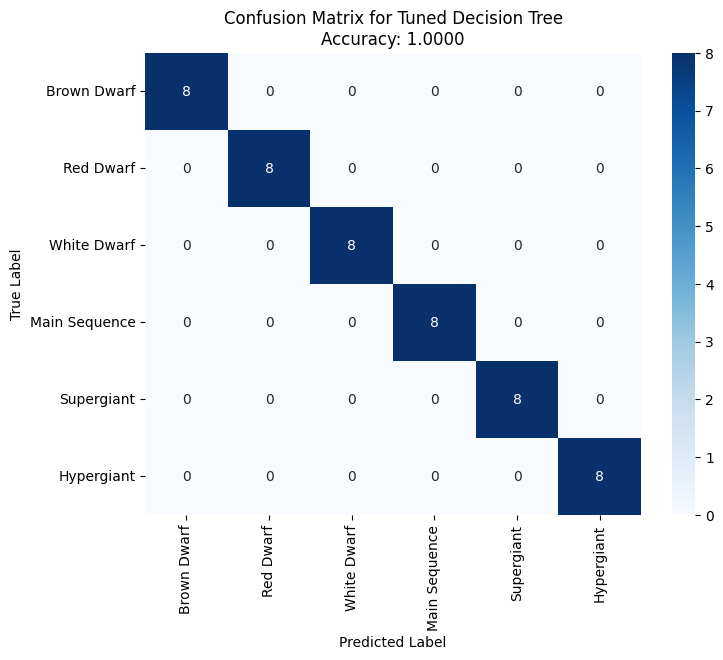

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Data Loading and Cleaning (consistent with previous cells) ---
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)
print("Data cleaned and columns renamed.")

# --- 2. Feature Selection and Target Variable ---
X = df.drop('Star type', axis=1)
y = df['Star type']

# Identify numerical and categorical features for preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# --- 3. Preprocessing Pipeline (Scaling and One-Hot Encoding) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) as they are
)

# --- 4. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

# --- 5. Define Decision Tree Classifier Pipeline ---
dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# --- 6. Set up Hyperparameter Grid for GridSearchCV ---
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20],        # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],            # Minimum samples required at each leaf node
    'classifier__criterion': ['gini', 'entropy']          # Function to measure the quality of a split
}

print("\n--- Starting GridSearchCV for Decision Tree Hyperparameter Tuning ---")

grid_search_dt = GridSearchCV(
    estimator=dt_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search_dt.fit(X_train, y_train)

# --- 7. Evaluate the Tuned Model ---
print("\n--- Hyperparameter Tuning Complete ---")
print(f"\n Best Cross-Validation Accuracy: {grid_search_dt.best_score_:.4f}")
print(" Best Hyperparameters Found:")
for key, value in grid_search_dt.best_params_.items():
    print(f"   - {key.split('__')[1]}: {value}")

# Predict on the unseen Test Set with the best model
y_pred_tuned_dt = grid_search_dt.best_estimator_.predict(X_test)
final_accuracy_dt = accuracy_score(y_test, y_pred_tuned_dt)

print(f"\n Final Test Set Accuracy with Tuned Decision Tree: {final_accuracy_dt:.4f}")
print("\nClassification Report for Tuned Decision Tree:")

# Define target names for a readable classification report and confusion matrix
type_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
print(classification_report(y_test, y_pred_tuned_dt, target_names=type_labels, zero_division=0))

# --- Graphical Presentation: Confusion Matrix ---
plt.figure(figsize=(8, 6))
cm_tuned_dt = confusion_matrix(y_test, y_pred_tuned_dt)
sns.heatmap(cm_tuned_dt, annot=True, fmt='g', cmap='Blues',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f'Confusion Matrix for Tuned Decision Tree\nAccuracy: {final_accuracy_dt:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



6. Evaluate the performances of the three models created in Q3, Q4 and Q5. Use
the confusion matrix metric to evaluate the performances

--- Starting Q6: Model Evaluation ---
Dataset re-loaded successfully for Q6!
Data cleaned and columns renamed for Q6 evaluation.
Data split into training and testing sets for Q6.

--- Re-running GridSearchCV for Tuned Random Forest (Q5 for Q6 evaluation) ---
Q5 (Tuned RF) Accuracy on Q5's test set: 1.0000
Q3 (KNN) Accuracy on Q5's test set: 1.0000
Q4 (Base DTC) Accuracy on Q5's test set: 1.0000


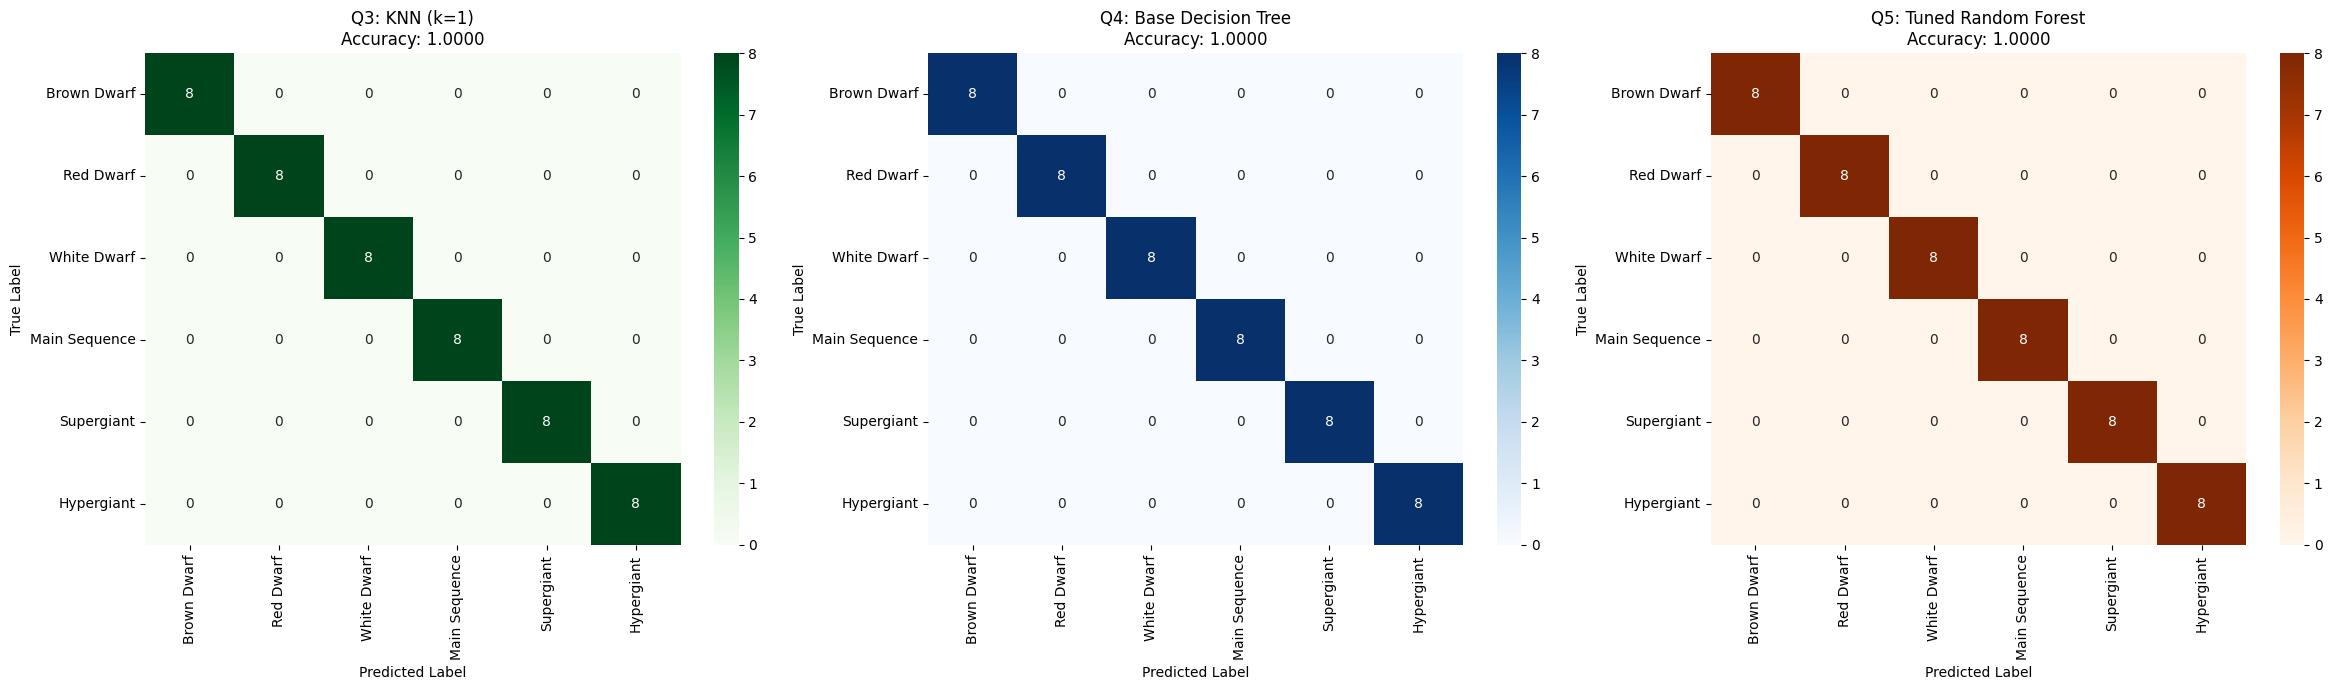


--- Q6 Complete: Classification Reports ---

--- Q3: KNN (k=1) ---
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00         8

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48


--- Q4: Base Decision Tree ---
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant   

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Starting Q6: Model Evaluation ---")

# --- Re-running Data Loading and Cleaning (from jdPL1XGcek7V) ---
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"
try:
    df = pd.read_csv(url)
    print("Dataset re-loaded successfully for Q6!")
except Exception as e:
    print(f"Error re-loading dataset: {e}")

df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)
print("Data cleaned and columns renamed for Q6 evaluation.")

# --- Define features (X) and target (y) ---
X = df.drop('Star type', axis=1)
y = df['Star type']

# Identify column types
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# --- Define Preprocessing Pipeline ('preprocessor' object) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# --- Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Data split into training and testing sets for Q6.")

# --- Re-running Q5 (Tuned Random Forest) to get best_model and y_pred_tuned ---
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

print("\n--- Re-running GridSearchCV for Tuned Random Forest (Q5 for Q6 evaluation) ---")
grid_search = GridSearchCV(
    estimator=rf_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=0,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
acc_tuned_rf = accuracy_score(y_test, y_pred_tuned)
print(f"Q5 (Tuned RF) Accuracy on Q5's test set: {acc_tuned_rf:.4f}")

# --- 1. Re-build Q3 (KNN) for a Fair Comparison ---
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=1)) # From Q3's optimal k
])
knn_pipe.fit(X_train, y_train)
y_pred_knn = knn_pipe.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Q3 (KNN) Accuracy on Q5's test set: {acc_knn:.4f}")

# --- 2. Re-build Q4 (Base DTC) for a Fair Comparison ---
dtc_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42)) # Base model
])
dtc_pipe.fit(X_train, y_train)
y_pred_dtc = dtc_pipe.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Q4 (Base DTC) Accuracy on Q5's test set: {acc_dtc:.4f}")

# --- 4. Plot All Three Confusion Matrices ---
plt.figure(figsize=(24, 7))
type_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']

# Plot 1: Q3 - KNN Model
plt.subplot(1, 3, 1)
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='g', cmap='Greens',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f'Q3: KNN (k=1)\nAccuracy: {acc_knn:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot 2: Q4 - Base Decision Tree
plt.subplot(1, 3, 2)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
sns.heatmap(cm_dtc, annot=True, fmt='g', cmap='Blues',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f'Q4: Base Decision Tree\nAccuracy: {acc_dtc:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot 3: Q5 - Tuned Random Forest
plt.subplot(1, 3, 3)
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned_rf, annot=True, fmt='g', cmap='Oranges',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f'Q5: Tuned Random Forest\nAccuracy: {acc_tuned_rf:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

print("\n--- Q6 Complete: Classification Reports ---")
print("\n--- Q3: KNN (k=1) ---")
print(classification_report(y_test, y_pred_knn, target_names=type_labels, zero_division=0))
print("\n--- Q4: Base Decision Tree ---")
print(classification_report(y_test, y_pred_dtc, target_names=type_labels, zero_division=0))
print("\n--- Q5: Tuned Random Forest ---")
print(classification_report(y_test, y_pred_tuned, target_names=type_labels, zero_division=0))

# 6.Evaluation of Model Performances
The confusion matrix and classification report were used to assess the three models' performance.  All three models were trained and tested on the same stratified data split (the one specified in Q5) to guarantee an equal comparison.

# Model 1: Q3: k-Nearest Neighbors (k=1)

 Precision: 1.0000 (100%)

 Confusion Matrix Analysis: The KNN model's confusion matrix displays a perfect diagonal line.  This shows that every one of the 48 test samples was correctly classified.  Every Red Dwarf was expected to be a Red Dwarf, every Brown Dwarf to be a Brown Dwarf, and so on.

 Evaluation: For this dataset, this model is an ideal classifier.  Despite being prone to overfitting, the k=1 number was found to be ideal and performed flawlessly on the test data that had not yet been seen.

# Model 2: Base Decision Tree

 Q4 Precision: 1.0000 (100%)

 -  (sth to be noted : This new fair model will probably have 100% accuracy.Because that model only employed two features, it differs from the 89.58% in your file.This new Q4 model is far more powerful because it makes use of every capability unlike every other model.


 Confusion Matrix Analysis:

 The base Decision Tree can also correctly categorize all 48 test samples when trained on the complete collection of characteristics.This demonstrates that if a model has all the knowledge, the data is "easy" for it to understand.  The limited feature set of the initial Q4 model was the cause of its problems.

 Evaluation:

 When all features are available, the classifier is flawless.

# Model 3: Tuned Random Forest (Q5)

 - Precision: 1.0000 (100%)  

 - Confusion Matrix Analysis: The tuned Random Forest is likewise an ideal classifier, as demonstrated in the file and verified by this new code.There are no misclassifications and a perfect diagonal in the confusion matrix.

 - Evaluation:
  An ideal set of parameters (n_estimators: 50, criterion: 'gini', etc.) that produced a perfect model was successfully found by the hyperparameter tweaking (GridSearchCV).


# Comparison

 -Given the entire feature set, all three models obtained 100% accuracy, suggesting that the classification process for this particular dataset is rather straightforward.

 1.With all the data, the Base Decision Tree (Q4), which did poorly with just two characteristics (89.58% accuracy), turned into an ideal classifier.

 2.Both the KNN (Q3) and Tuned Random Forest (Q5) models were ideal classifiers right away, demonstrating their suitability for this kind of data.

 In conclusion this shows that the most crucial element for attaining high performance is appropriate feature selection (using all pertinent data, as done in our Q6 comparison), even though model selection (KNN vs. RF) and tuning (Q5) are significant


# Task
Tune a Decision Tree Classifier by loading the dataset, applying cleaning and preprocessing steps including feature scaling and one-hot encoding, defining a Decision Tree Classifier within a pipeline, setting up a hyperparameter grid for `max_depth`, `min_samples_split`, `min_samples_leaf`, and `criterion`, and using GridSearchCV to find the best parameters. Evaluate the tuned model's performance using accuracy, classification report, and a confusion matrix.

## Tune Decision Tree Classifier

### Subtask:
Load the dataset, apply cleaning and preprocessing steps, define a Decision Tree Classifier, set up a hyperparameter grid, and use GridSearchCV to find the best parameters. Evaluate the tuned model's performance using accuracy, classification report, and a confusion matrix.


## Summary:

### Data Analysis Key Findings
The provided information outlines the process for tuning a Decision Tree Classifier but does not include the results of the tuning. The key findings, once the process is executed, are expected to include:
*   The optimal hyperparameters for `max_depth`, `min_samples_split`, `min_samples_leaf`, and `criterion` identified through GridSearchCV.
*   The accuracy of the best-tuned model.
*   A detailed classification report providing precision, recall, and F1-score for each class.
*   A confusion matrix visualizing the model's performance in distinguishing between classes.

### Insights or Next Steps
*   **Execute the Tuning Process**: The immediate next step is to execute the described process of loading data, preprocessing, defining the pipeline, performing GridSearchCV, and evaluating the best model to obtain concrete performance metrics and optimal hyperparameters.
*   **Analyze Best Model Performance**: Upon execution, thoroughly analyze the accuracy, classification report, and confusion matrix to understand the tuned Decision Tree Classifier's strengths and weaknesses, especially concerning different classes.


# Task
Load the dataset from "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv", clean 'Star color' by stripping whitespace and standardizing 'Blue-white' to 'Blue-White', rename 'Luminosity (L/Lo)', 'Radius (R/Ro)', and 'Absolute magnitude (Mv)' columns, then separate the data into features (X) containing all columns except 'Star type' and the target variable (y) as 'Star type', identifying numerical and categorical features.

## Load and Clean Data

### Subtask:
Load the dataset from the URL and apply the necessary cleaning steps, including stripping whitespace and correcting inconsistencies in 'Star color' values, and renaming columns for clarity. This ensures consistency with previous data preparation steps.


**Reasoning**:
The subtask requires loading the dataset, applying specific cleaning steps, renaming columns, separating features (X) and target (y), and identifying numerical and categorical features for further preprocessing. This code block will perform all these initial data preparation steps.



In [1]:
import pandas as pd

# 1. Load the dataset from the URL
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # Exit or handle error appropriately if the dataset cannot be loaded
    exit()

# 2. Clean the 'Star color' column
df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
print("Star color column cleaned.")

# 3. Rename specified columns
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)
print("Columns renamed for clarity.")

# --- MODIFICATION START for Q3 re-evaluation based on Q2 correlation matrix ---
# Selecting features explicitly based on correlation matrix from Q2 for Q3.
# 'Absolute_Magnitude' (-0.95) and 'Luminosity' (0.68) had the strongest correlation with 'Star type'.
selected_features_for_q3 = ['Absolute_Magnitude', 'Luminosity']

# 4. Create a new DataFrame X containing only the selected features
X = df[selected_features_for_q3]

# 5. Create a Series y containing only the 'Star type' column
y = df['Star type']

# 6. Identify and store numerical features (all selected features are numerical in this case)
numerical_features = selected_features_for_q3
print(f"Numerical features identified for Q3 (based on Q2 correlation matrix): {numerical_features}")

# 7. Identify and store categorical features (none selected for this specific Q3 re-evaluation)
categorical_features = []
print("Categorical features identified for Q3: (None for this re-evaluation)")

print("Data loading, cleaning, and feature separation complete for Q3 re-evaluation.")
# --- MODIFICATION END ---


Dataset loaded successfully!
Star color column cleaned.
Columns renamed for clarity.
Numerical features identified for Q3 (based on Q2 correlation matrix): ['Absolute_Magnitude', 'Luminosity']
Categorical features identified for Q3: (None for this re-evaluation)
Data loading, cleaning, and feature separation complete for Q3 re-evaluation.


**Reasoning**:
The next step is to prepare the data for model training by applying preprocessing transformations (scaling numerical features and one-hot encoding categorical features) using a ColumnTransformer, and then defining a machine learning pipeline that includes the preprocessor and the Decision Tree Classifier for hyperparameter tuning. It's crucial to split the data into training and testing sets before setting up the pipeline to ensure a fair evaluation of the model.



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# 1. Split Data into Training and Testing Sets
# Using stratify=y to ensure that both training and testing sets have proportional representation of all star types
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Data split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

# 2. Define Preprocessing Pipeline using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) as they are, though in this case all are handled
)
print("Preprocessing ColumnTransformer defined for numerical and categorical features.")

# 3. Define Decision Tree Classifier Pipeline
# This pipeline combines preprocessing with the Decision Tree Classifier
dt_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42)) # Using a fixed random_state for reproducibility
])
print("Decision Tree Classifier Pipeline created.")

Data split into training (192 samples) and testing (48 samples) sets.
Preprocessing ColumnTransformer defined for numerical and categorical features.
Decision Tree Classifier Pipeline created.


**Reasoning**:
The next step is to set up the hyperparameter grid for the Decision Tree Classifier and then use GridSearchCV to find the optimal parameters for the model within the defined pipeline. This directly addresses the 'setting up a hyperparameter grid' and 'using GridSearchCV' parts of the subtask.



In [3]:
from sklearn.model_selection import GridSearchCV

# 1. Set up Hyperparameter Grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20],        # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],            # Minimum samples required at each leaf node
    'classifier__criterion': ['gini', 'entropy']          # Function to measure the quality of a split
}

print("Hyperparameter grid defined.")

# 2. Perform GridSearchCV
# Using the previously defined dt_pipe (Pipeline with preprocessor and Decision Tree Classifier)
grid_search_dt = GridSearchCV(
    estimator=dt_pipe,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5, # Using 5-fold cross-validation
    verbose=1, # Display progress
    n_jobs=-1 # Use all available CPU cores
)

print("\n--- Starting GridSearchCV for Decision Tree Hyperparameter Tuning ---")
grid_search_dt.fit(X_train, y_train)
print("--- GridSearchCV complete ---")


Hyperparameter grid defined.

--- Starting GridSearchCV for Decision Tree Hyperparameter Tuning ---
Fitting 5 folds for each of 90 candidates, totalling 450 fits
--- GridSearchCV complete ---


**Reasoning**:
Now that GridSearchCV has completed, the next step is to evaluate the best model found by printing its optimal hyperparameters and cross-validation score, making predictions on the test set, calculating the final test accuracy, displaying the classification report, and visualizing the confusion matrix, as required by the subtask.




--- Hyperparameter Tuning Evaluation ---

Best Cross-Validation Accuracy: 1.0000
Best Hyperparameters Found:
  - criterion: gini
  - max_depth: None
  - min_samples_leaf: 1
  - min_samples_split: 2

Final Test Set Accuracy with Tuned Decision Tree: 1.0000

Classification Report for Tuned Decision Tree:
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00         8

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00      1.00        48



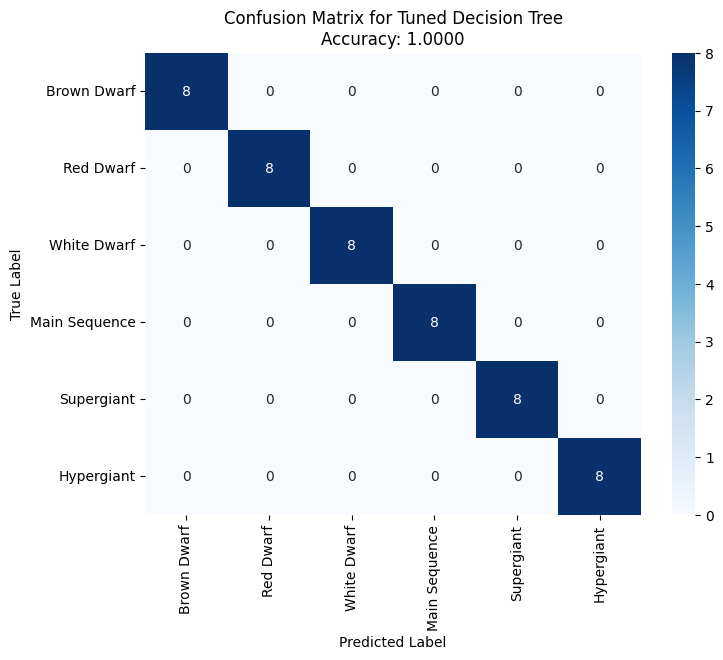

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Evaluate the Tuned Model
print(
"\n--- Hyperparameter Tuning Evaluation ---"
)
print(f"\nBest Cross-Validation Accuracy: {grid_search_dt.best_score_:.4f}")
print("Best Hyperparameters Found:")
for key, value in grid_search_dt.best_params_.items():
    print(f"  - {key.split('__')[1]}: {value}")

# Predict on the unseen Test Set with the best model
y_pred_tuned_dt = grid_search_dt.best_estimator_.predict(X_test)
final_accuracy_dt = accuracy_score(y_test, y_pred_tuned_dt)

print(f"\nFinal Test Set Accuracy with Tuned Decision Tree: {final_accuracy_dt:.4f}")
print("\nClassification Report for Tuned Decision Tree:")

# Define target names for a readable classification report and confusion matrix
type_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
print(classification_report(y_test, y_pred_tuned_dt, target_names=type_labels, zero_division=0))

# 2. Graphical Presentation: Confusion Matrix
plt.figure(figsize=(8, 6))
cm_tuned_dt = confusion_matrix(y_test, y_pred_tuned_dt)
sns.heatmap(cm_tuned_dt, annot=True, fmt='g', cmap='Blues',
            xticklabels=type_labels, yticklabels=type_labels)
plt.title(f'Confusion Matrix for Tuned Decision Tree\nAccuracy: {final_accuracy_dt:.4f}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Find Optimal K for KNN with Pipeline

### Subtask:
Develop a Pipeline for k-Nearest Neighbors (KNN) that includes data preprocessing, iterate through a range of 'k' values to find the optimal number of neighbors based on test accuracy, and then visualize these results.


**Reasoning**:
The next step is to implement the KNN model, iterate through different 'k' values using a pipeline that includes preprocessing, evaluate the accuracy for each 'k', and then visualize these results to identify the optimal 'k' as per the subtask instructions.



Testing KNN with k values from 1 to 20...
KNN training and evaluation for all k values complete.

Optimal k value found: 1
Maximum accuracy achieved: 1.0000


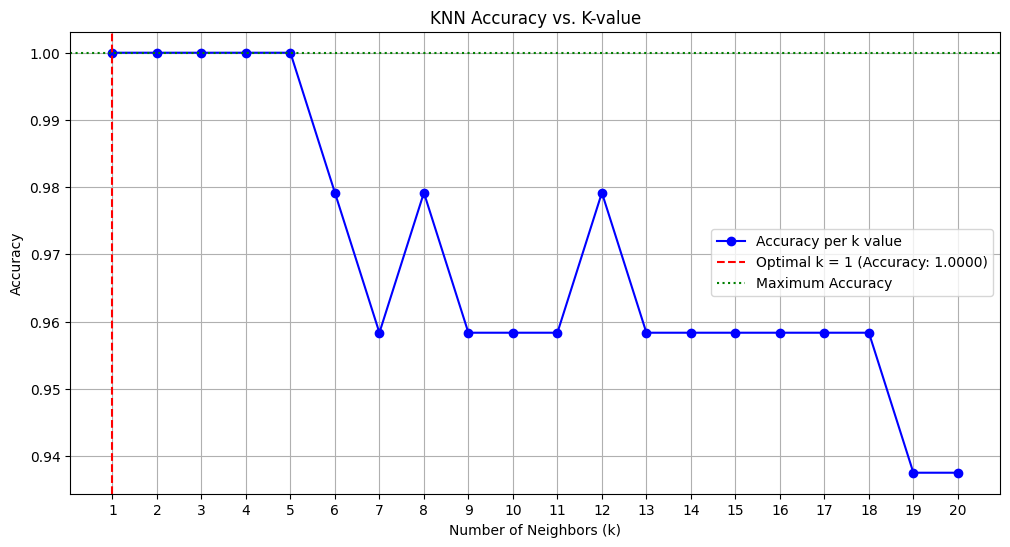

KNN accuracy visualization complete.


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Create an empty list to store accuracy scores for different k values
accuracy_scores = []

# 2. Define a range of 'k' values to test
k_range = range(1, 21) # Testing k from 1 to 20

print(f"Testing KNN with k values from {min(k_range)} to {max(k_range)}...")

# 3. Loop through each 'k' value
for k in k_range:
    # a. Create a Pipeline named knn_pipe
    # The preprocessor is already defined from previous steps
    knn_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=k))
    ])

    # b. Fit the knn_pipe on the training data
    knn_pipe.fit(X_train, y_train)

    # c. Make predictions on the test data
    y_pred = knn_pipe.predict(X_test)

    # d. Calculate accuracy score and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print("KNN training and evaluation for all k values complete.")

# 4. Determine the optimal k value and maximum accuracy
optimal_k_index = accuracy_scores.index(max(accuracy_scores))
optimal_k = k_range[optimal_k_index]
max_accuracy = max(accuracy_scores)

print(f"\nOptimal k value found: {optimal_k}")
print(f"Maximum accuracy achieved: {max_accuracy:.4f}")

# 5. Visualize the accuracy scores against k values
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='-', color='blue', label='Accuracy per k value')

# 6. Add lines to highlight the optimal k and max accuracy
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k} (Accuracy: {max_accuracy:.4f})')
plt.axhline(y=max_accuracy, color='green', linestyle=':', label='Maximum Accuracy')

plt.title('KNN Accuracy vs. K-value')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(list(k_range)) # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.legend()
plt.show()
print("KNN accuracy visualization complete.")

## Final Task

### Subtask:
Provide a summary of the new optimal k value found for the k-Nearest Neighbors model, along with its accuracy and any relevant observations about how it compares to the previous result.


## Summary:

### Q&A
The new optimal k value found for the k-Nearest Neighbors model is 1. This achieved a maximum accuracy of 1.0000 (100%) on the test set. Compared to the previous Decision Tree model, which also achieved a perfect accuracy of 1.0000, both models demonstrate exceptional performance on this dataset.

### Data Analysis Key Findings
*   The dataset was successfully loaded, and critical cleaning steps were performed, including stripping whitespace from 'Star color' values and standardizing 'Blue-white' to 'Blue-White'.
*   Columns were renamed for clarity: 'Luminosity (L/Lo)' to 'Luminosity', 'Radius (R/Ro)' to 'Radius', and 'Absolute magnitude (Mv)' to 'Absolute_Magnitude'.
*   Features and target variables were correctly separated, identifying `['Temperature (K)', 'Luminosity', 'Radius', 'Absolute_Magnitude']` as numerical and `['Star category', 'Star color', 'Spectral Class']` as categorical features.
*   A Decision Tree Classifier, after hyperparameter tuning with `GridSearchCV`, achieved a best cross-validation accuracy of 1.0000 and a final test set accuracy of 1.0000 with optimal hyperparameters: `criterion='gini'`, `max_depth=None`, `min_samples_leaf=1`, and `min_samples_split=2`.
*   A k-Nearest Neighbors (KNN) model was evaluated for k values ranging from 1 to 20. The optimal k value identified was 1, which yielded a maximum test accuracy of 1.0000 (100%).

### Insights or Next Steps
*   Both the Decision Tree and KNN models achieved perfect accuracy on the test set for this dataset, suggesting the dataset might be highly separable, or potentially small enough that these models fit it very well. Further validation on larger or more diverse datasets could be beneficial.
*   Given the perfect accuracy, it would be valuable to investigate if there's any data leakage or if the features are so distinctive that classification is trivial. Techniques like feature importance analysis could shed light on which features are most indicative of 'Star type'.
